In [712]:
import pandas as pd
import os
import numpy as np
from ensure import ensure_annotations
import re
import warnings
warnings.filterwarnings('ignore')

In [713]:
print(os.getcwd())
print(os.chdir(r'd:\vscode_machineLearning\BEST_PROJECTS\mobileRecommenderSystem'))
print(os.getcwd())

d:\vscode_machineLearning\BEST_PROJECTS\mobileRecommenderSystem
None
d:\vscode_machineLearning\BEST_PROJECTS\mobileRecommenderSystem


In [714]:
df = pd.read_csv('data\data_to_merge\samsung_data.csv',index_col=None)

In [715]:
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,"₹8,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBTotal Memory64 GBE...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type4G, 3G, 2GSupported NetworksGSM, C...",Battery Capacity5000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹11,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
...,...,...,...,...,...,...,...,...
490,SAMSUNG SM-B310EZDDINS,4.3,"₹2,149",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 13Processor TypeQualco...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh
491,"SAMSUNG Galaxy M11 (Violet, 64 GB)",4.6,"₹12,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 10Processor TypeEx...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity4000 mAh
492,"SAMSUNG Galaxy M01 (Red, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid Nougat 7Processor Type...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity5000 mAh
493,"SAMSUNG Galaxy A12 (Blue, 128 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeMediaT...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity4500 mAh


In [716]:
df.duplicated().sum()

3

In [717]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [718]:
@ensure_annotations
def random_values(feature_name:str,total=6):
    for i in range(0,total):
        index = np.random.randint(df.shape[0])
        print(index,':',df[feature_name].iloc[index])
            

## Battery

In [719]:
def extract_battery(row):
    return row.split()[1]

In [720]:
df['battery'] = df['battery'].apply(func=extract_battery)

In [721]:
random_values('battery')

77 : Capacity5000
63 : Capacity5000
329 : Capacity5000
106 : Capacity5000
234 : Capacity3300
319 : Capacity6000


In [722]:
count = 0
for i in range(0,len(df['battery'])):
    # print(i)
    df['battery'][i]= df['battery'].iloc[i].replace('Capacity','')
    # print(df['battery'][i])
    count+=1
print(f'looped till {count} index')

looped till 492 index


In [723]:
random_values('battery',10)

220 : 4400
68 : 5000
425 : 4000
96 : 5000
226 : 5000
321 : 5000
92 : 5000
130 : 5000
192 : 4500
85 : 5000


In [724]:
df['battery'] = df['battery'].astype('Int16')

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_names   492 non-null    object 
 1   ratings       492 non-null    float64
 2   price         492 non-null    object 
 3   imgURL        492 non-null    object 
 4   storage_ram   492 non-null    object 
 5   os_processor  492 non-null    object 
 6   network       492 non-null    object 
 7   battery       492 non-null    Int16  
dtypes: Int16(1), float64(1), object(6)
memory usage: 28.5+ KB


## Price

In [726]:
for Index,i in enumerate(df['price']):
    i = str(i).replace('₹','')
    i = str(i).replace(',','')
    df['price'][Index] = i

In [727]:
df['price'] = df['price'].astype('Int16')

In [728]:
df.describe()

,ratings,price,battery
count,492.000000,492.0,492.0
mean,4.183130,11173.046748,4601.321138
std,0.219748,14556.505536,1399.273627
min,2.900000,-32546.0,800.0
25%,4.100000,8499.0,4400.0
50%,4.200000,13999.0,5000.0
75%,4.300000,18927.0,5000.0
max,4.800000,32000.0,7000.0


In [729]:
import seaborn as sns
import matplotlib.pyplot as plt

In [730]:
# sns.histplot(df['price'])

In [731]:
df[df['price'] <= 0] # I have negative price also I have to make 

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
30,"SAMSUNG Galaxy S22 Plus 5G (Phantom Black, 128...",4.5,-15537,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GB,Operating SystemAndroid 12Processor TypeMediaT...,Network Type4GSupported Networks4G LTE3GYesGPR...,4500
40,"SAMSUNG Galaxy A34 5G (Awesome Violet, 256 GB)",4.2,-32537,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM8 GBTotal Memory256 G...,Processor Type0 0 0 0 ProcessorOperating Frequ...,"Network Type2G, 3G, 4G VOLTE, 5GSupported Netw...",5000
42,"SAMSUNG Galaxy A34 5G (Awesome Lime, 256 GB)",4.2,-32537,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM8 GBTotal Memory256 G...,Operating SystemAndroid 12Processor TypeOcta C...,"Network Type2G, 3G, 4G VOLTE, 5GSupported Netw...",5000
44,"SAMSUNG Galaxy A34 5G (Awesome Graphite, 256 GB)",4.2,-32537,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage256 GBRAM8 GBTotal Memory256 G...,Operating SystemAndroid 12Processor CoreOcta C...,"Network Type2G, 3GSupported NetworksGSM",5000
56,"SAMSUNG Galaxy A54 5G (Awesome Violet, 128 GB)",4.3,-26537,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,Network Type2GSupported NetworksGSM3GNoGPRSNoW...,5000
59,"SAMSUNG Galaxy Z Flip3 5G (Cream, 128 GB)",4.3,-20537,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeOcta-c...,"Network Type4G VOLTESupported Networks4G LTE, ...",3300
65,"SAMSUNG Galaxy Z Flip3 5G (Phantom Black, 128 GB)",4.3,-20537,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBCall Log MemoryYes,Operating SystemAndroid 12Processor TypeExynos...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",3300
67,"SAMSUNG Galaxy A53 (Awesome Black, 256 GB)",4.1,-31547,https://rukminim2.flixcart.com/image/312/312/l...,Internal Storage256 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 10Processor CoreOcta C...,Network Type2GSupported NetworksGSM3GNoBluetoo...,5000
68,"SAMSUNG Galaxy A53 (Awesome Peach, 256 GB)",4.1,-31186,https://rukminim2.flixcart.com/image/312/312/l...,Internal Storage256 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Network Type5GSupported Networks5G,5000
76,"SAMSUNG Galaxy A53 (Awesome Black, 128 GB)",4.1,-32546,https://rukminim2.flixcart.com/image/312/312/l...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 12Processor CoreOcta C...,Network Type5GSupported Networks5G,5000


In [732]:
df['price'] = df['price'].replace('-','')

In [733]:
df['price'] = df['price'].astype(object)
for Index,i in enumerate(df['price']):
    if i <= 0:
        i = str(i).replace('-','')
        df['price'][Index] = i

In [734]:
df.iloc[468]

model_names          SAMSUNG Galaxy Fold 2 (Mystic Black, 256 GB)
ratings                                                       4.0
price                                                        6609
imgURL          https://rukminim2.flixcart.com/image/312/312/k...
storage_ram     Internal Storage64 GBRAM6 GBExpandable Storage...
os_processor                           Primary Clock Speed208 MHz
network         Network Type4G VOLTESupported Networks4G VoLTE...
battery                                                      6000
Name: 468, dtype: object

In [735]:
non_numeric_prices = df[~df['price'].apply(lambda x: str(x).isdigit())]
print(non_numeric_prices)


Empty DataFrame
Columns: [model_names, ratings, price, imgURL, storage_ram, os_processor, network, battery]
Index: []


In [736]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [737]:
df['price'] = df['price'].astype('Int16')
# df[df['price'] <= 0]

In [738]:
df[df['price'] <= 0]

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery


## Removing keypad mobiles

In [739]:
df[df['price']<=6000].shape

(55, 8)

In [740]:
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,8499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBTotal Memory64 GBE...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type4G, 3G, 2GSupported NetworksGSM, C...",5000
1,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.3,10999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.3,10999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,10999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
...,...,...,...,...,...,...,...,...
487,SAMSUNG SM-B310EZDDINS,4.3,2149,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 13Processor TypeQualco...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",5000
488,"SAMSUNG Galaxy M11 (Violet, 64 GB)",4.6,12999,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 10Processor TypeEx...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",4000
489,"SAMSUNG Galaxy M01 (Red, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid Nougat 7Processor Type...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",5000
490,"SAMSUNG Galaxy A12 (Blue, 128 GB)",4.2,14999,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeMediaT...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",4500


In [741]:
df = df.drop(labels=df[df['price']<=6000].index)

In [742]:
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,8499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBTotal Memory64 GBE...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type4G, 3G, 2GSupported NetworksGSM, C...",5000
1,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.3,10999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.3,10999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,10999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000
...,...,...,...,...,...,...,...,...
486,"SAMSUNG Galaxy J2 2018 (Gold, 16 GB)",4.4,8200,https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage100 MBRAM100 MBTotal Memory32 ...,Operating SystemAndroid 10Processor TypeExynos...,"Network Type3G, 4G, 2GSupported Networks4G LTE...",800
488,"SAMSUNG Galaxy M11 (Violet, 64 GB)",4.6,12999,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 10Processor TypeEx...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",4000
489,"SAMSUNG Galaxy M01 (Red, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid Nougat 7Processor Type...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",5000
490,"SAMSUNG Galaxy A12 (Blue, 128 GB)",4.2,14999,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeMediaT...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",4500


## Storage and Ram

In [743]:
df.reset_index(inplace=True)

In [744]:
def extract_storage(row):
    storage = row.split()[1]
    return storage

def extract_ram(row):
    ram = row.split()[2]
    return ram

df['storage'] = df['storage_ram'].apply(func=extract_storage)
df['ram'] = df['storage_ram'].apply(func=extract_ram)

In [745]:
random_values('storage')

124 : Storage256
390 : Storage32
399 : Storage128
418 : Storage128
20 : Storage128
305 : Storage128


In [746]:
random_values('ram')

301 : GBRAM4
430 : GBRAM6
404 : GBRAM3
78 : GBRAM6
256 : GBRAM8
237 : GBRAM6


In [747]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['storage'])):
    df['storage'][i]= df['storage'].iloc[i].replace('Storage','')
    count+=1
print(f'looped till {count} index')

looped till 437 index


In [748]:
random_values('storage')

153 : 64
348 : 128
4 : 128
222 : 16
171 : 128
26 : 128


In [749]:
# df['storage'] = df['storage'].astype('Int16')

In [750]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['ram'])):
    # df['ram'][i]= df['ram'].iloc[i].replace('MBRAM','')
    df['ram'][i]= df['ram'].iloc[i].replace('GBRAM','')
    count+=1
print(f'looped till {count} index')

looped till 437 index


In [751]:
df[df['ram'] == 'MBRAM64']

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram


In [752]:
random_values('ram')

108 : 4
71 : 6
90 : 8
220 : 12
243 : 8
222 : 2


In [762]:
patt = '\d+'
indx = []
for index,i in enumerate(df['ram']):
    match = re.search(patt,i)
    # print(match)
    if match ==None:
        indx.append(index)
        # df['ram'].iloc[index] = np.nan


In [763]:
df.iloc[indx]

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
419,470,"SAMSUNG Galaxy A22 5G (Violet, 128 GB)",4.2,22499,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 MBPhone Book MemoryYesSMS ...,Operating SystemAndroid Oreo 8Processor TypeSa...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",800,128,MBPhone


In [764]:
df = df.drop(indx)

In [767]:
pattern = r'MBRAM+'
re.findall(pattern,df['ram'].iloc[332])

[]

In [754]:
random_values('ram')

SyntaxError: invalid syntax (1201843887.py, line 1)

In [ ]:
df.reset_index(inplace=True)

## Processors


In [ ]:
def extract_processor(text):
    pattern = r'.*Processor'
    match = re.findall(pattern, text)
    if match:
        return match[0]
    else:
        return text


In [ ]:
df['processors'] = df['os_processor'].apply(func=extract_processor)

## Android Version

In [ ]:
def android_version(text_):
    pattern=r'^\d+[Processor]|\d+[GProcessor]|\d+[.Processor]'
    found = re.findall(pattern,text_)
    if found:
        return found[0]
    else:
        return np.nan

In [ ]:
df['android_version'] = df['processors'].apply(android_version)

In [ ]:
for Index,i in enumerate(df['android_version']):
    # print(i)
    i = str(i).replace('P','')
    i = str(i).replace('.','')
    df['android_version'][Index] = i

In [ ]:
# df['android_version'] = df['android_version'].astype('Int16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            498 non-null    int64  
 1   model_names      498 non-null    object 
 2   ratings          498 non-null    float64
 3   price            498 non-null    object 
 4   imgURL           498 non-null    object 
 5   storage_ram      498 non-null    object 
 6   os_processor     498 non-null    object 
 7   network          498 non-null    object 
 8   battery          498 non-null    Int16  
 9   storage          498 non-null    Int16  
 10  ram              498 non-null    Int16  
 11  processors       498 non-null    object 
 12  android_version  498 non-null    object 
dtypes: Int16(3), float64(1), int64(1), object(8)
memory usage: 43.4+ KB


In [ ]:
# df

## Processors

In [ ]:
def processor(text):
    pattern=r'(?<=Type).*'
    search = re.search(pattern,text)
    if search != None:
        return ' '.join(re.findall(pattern,text))
    else:
        return 'not montioned'

In [ ]:
df['processors'] = df['processors'].apply(processor)

In [ ]:
df

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram,processors,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,6000,128,8,not montioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,6000,128,8,not montioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",5000,32,2,not montioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",4050,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,4000,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",4520,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",4000,64,4,Qualcomm Snapdragon 636Processor,7


## Remove columns
1) storage_ram
2) os_processor


In [ ]:
df = df.drop(columns=['os_processor','storage_ram'])

In [ ]:
df.rename({'processors':'processor'},axis=1,inplace=True)

In [ ]:
# df.tail()

In [ ]:
df

,index,model_names,ratings,price,imgURL,network,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,https://rukminim2.flixcart.com/image/312/312/x...,Network Type4G VOLTESupported Networks4G LTE,6000,128,8,not montioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,https://rukminim2.flixcart.com/image/312/312/x...,Network Type4G VOLTESupported Networks4G VoLTE,6000,128,8,not montioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",5000,32,2,not montioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",4050,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/m...,Network Type4G VOLTESupported Networks4G LTEBl...,4000,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type4G VOLTE, 5GSupported Networks4G V...",4520,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",4000,64,4,Qualcomm Snapdragon 636Processor,7


## Processor

In [ ]:
df['processor']

0                                         not montioned
1                                         not montioned
2                                         not montioned
3                                         not montioned
4                     Qualcomm Snapdragon 778GProcessor
                             ...                       
493    Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor
494                                       not montioned
495                                       not montioned
496                    Qualcomm Snapdragon 636Processor
497                    Qualcomm Snapdragon 435Processor
Name: processor, Length: 498, dtype: object

In [ ]:
@ensure_annotations
def random_values(feature_name:str,total=6):
    for i in range(0,total):
        index = np.random.randint(df.shape[0])
        print(index,':',df[feature_name].iloc[index])
            

In [ ]:
random_values('processor',10)

92 : Mediatek Dimensity 920Processor
15 : 2.0 GHz Mediatek P22 OctacoreProcessor
489 : Qualcomm Snapdragon 410 MSM8916Processor
116 : Qualcomm Snapdragon 730Processor
229 : not montioned
382 : Qualcomm® Snapdragon™ 720GProcessor
22 : Qualcomm Snapdragon 636Processor
77 : Qualcomm Snapdragon 636Processor
340 : not montioned
289 : not montioned


In [ ]:
def processor_extract(text):
    splitted_sentence = text.split()
    if 'Mediatek' and 'Helio' in splitted_sentence:
        pattern = r'\d+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Heilo'+''.join(match)

    elif 'Mediatek' and 'Dimensity' in splitted_sentence:
        pattern = r'\d+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Dimensity'+ ''.join(match)

    elif 'Snapdragon' and 'Gen' and '4' in splitted_sentence:
        return 'Gen4'   

    elif 'Snapdragon' and 'Gen' and '8' in splitted_sentence:         
        return 'Gen8'
    
    elif 'Snapdragon' in splitted_sentence:
        pattern = r'\d+[Processor]|\d+[GProcessor]'
        if 'Gen' and '4' and '8' not in splitted_sentence:
            string = ' '.join(splitted_sentence)
            match = re.findall(pattern,string)
            return 'Snapdragon'+''.join(match)

    else:
        return 'not mentioned'      

In [ ]:
df['processor']=df['processor'].apply(processor_extract)

In [ ]:
random_values('processor')

26 : not mentioned
193 : Dimensity1080P
355 : not mentioned
462 : Snapdragon
251 : Heilo35P
472 : Snapdragon855P


## Network
I don't need in my project I will just drop.

In [ ]:
df = df.drop(labels=['network'],axis=1)

In [ ]:
df

,index,model_names,ratings,price,imgURL,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,https://rukminim2.flixcart.com/image/312/312/x...,6000,128,8,not mentioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,https://rukminim2.flixcart.com/image/312/312/x...,6000,128,8,not mentioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,https://rukminim2.flixcart.com/image/312/312/x...,5000,32,2,not mentioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,https://rukminim2.flixcart.com/image/312/312/x...,5000,32,3,not mentioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,https://rukminim2.flixcart.com/image/312/312/x...,4250,128,6,Snapdragon778G,11
...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,https://rukminim2.flixcart.com/image/312/312/k...,4050,32,3,Snapdragon8G,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/m...,4000,32,3,not mentioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,https://rukminim2.flixcart.com/image/312/312/k...,4520,128,6,not mentioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,https://rukminim2.flixcart.com/image/312/312/k...,4000,64,4,Snapdragon636P,7


In [ ]:
df.to_csv(path_or_buf='data\cleaned_dataset/mi_cleaned_data.csv')

In [ ]:
random_values('storage_ram')

437 : Internal Storage2.27 MBRAM512 MB
147 : Internal Storage128 GBRAM4 GBTotal Memory128 GBExpandable Storage1 TBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot
380 : Internal Storage128 GBRAM8 GBMemory Card Slot TypeHybrid Slot
320 : Internal StorageNAPhone Book Memory1000Hot SWAP SupportNoCall Log MemoryYesSMS Memory500
242 : Internal Storage16 GBRAM2 GBExpandable Storage128 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated SlotCall Log MemoryYes
399 : Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypemicroSDXCMemory Card Slot TypeDedicated Slot


In [ ]:
def extract_storage(row):
    storage = row.split()[1]
    return storage

def extract_ram(row):
    ram = row.split()[2]
    return ram

df['storage'] = df['storage_ram'].apply(func=extract_storage)
df['ram'] = df['storage_ram'].apply(func=extract_ram)

In [ ]:
random_values('storage_ram')

210 : Internal Storage256 GBRAM12 GBCall Log MemoryYes
366 : Internal Storage32 GBRAM3 GBExpandable Storage256 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated SlotCall Log MemoryYes
75 : Internal Storage128 GBRAM6 GBTotal Memory128 GBExpandable Storage1 TBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot
132 : Internal Storage128 GBRAM8 GBMemory Card Slot TypeDedicated Slot
334 : Internal Storage128 GBRAM6 GBMemory Card Slot TypeDedicated Slot
462 : Internal Storage128 GBRAM8 GBExpandable Storage512 GBMemory Card Slot TypeDedicated SlotCall Log MemoryYes


In [ ]:
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
0,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,"₹8,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBTotal Memory64 GBE...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type4G, 3G, 2GSupported NetworksGSM, C...",5000,Storage64,GBRAM4
1,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,Storage64,GBRAM4
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,Storage64,GBRAM4
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,Storage64,GBRAM4
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹11,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,Storage128,GBRAM4
...,...,...,...,...,...,...,...,...,...,...
487,SAMSUNG SM-B310EZDDINS,4.3,"₹2,149",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 13Processor TypeQualco...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",5000,Storage64,GBRAM4
488,"SAMSUNG Galaxy M11 (Violet, 64 GB)",4.6,"₹12,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 10Processor TypeEx...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",4000,Storage32,GBRAM3
489,"SAMSUNG Galaxy M01 (Red, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid Nougat 7Processor Type...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",5000,Storage128,GBRAM4
490,"SAMSUNG Galaxy A12 (Blue, 128 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeMediaT...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",4500,Storage128,GBRAM6


In [ ]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['storage'])):
    df['storage'][i]= df['storage'].iloc[i].replace('Storage','')
    count+=1
print(f'looped till {count} index')

looped till 492 index


In [ ]:
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
0,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,"₹8,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBTotal Memory64 GBE...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type4G, 3G, 2GSupported NetworksGSM, C...",5000,64,GBRAM4
1,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,64,GBRAM4
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,64,GBRAM4
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,64,GBRAM4
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹11,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,128,GBRAM4
...,...,...,...,...,...,...,...,...,...,...
487,SAMSUNG SM-B310EZDDINS,4.3,"₹2,149",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 13Processor TypeQualco...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",5000,64,GBRAM4
488,"SAMSUNG Galaxy M11 (Violet, 64 GB)",4.6,"₹12,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 10Processor TypeEx...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",4000,32,GBRAM3
489,"SAMSUNG Galaxy M01 (Red, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid Nougat 7Processor Type...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",5000,128,GBRAM4
490,"SAMSUNG Galaxy A12 (Blue, 128 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeMediaT...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",4500,128,GBRAM6


In [ ]:
# df['storage'] = df['storage'].astype('Int16')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['ram'])):
    # df['ram'][i]= df['ram'].iloc[i].replace('MBRAM','')
    df['ram'][i]= df['ram'].iloc[i].replace('GBRAM','')
    count+=1
print(f'looped till {count} index')

looped till 492 index


In [ ]:
random_values('ram')

56 : 8
300 : 4
352 : 6
74 : 6
146 : 3
486 : MBRAM100


In [ ]:
not_match_ram = []
patt = '\d+'
for index , i in enumerate(df['ram']):
    match = re.search(patt,i)
    if match == None:
        not_match_ram.append(index)
        print(index,match)

12 None
13 None
28 None
36 None
55 None
69 None
111 None
131 None
209 None
223 None
291 None
311 None
312 None
320 None
326 None
345 None
346 None
358 None
367 None
387 None
406 None
408 None
417 None
432 None
470 None


In [ ]:
df.iloc[not_match_ram]

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
12,SAMSUNG Guru Music 2,4.3,"₹2,790",https://rukminim2.flixcart.com/image/312/312/k...,Internal StorageNACall Log MemoryYesSMS MemoryYes,Operating System0Primary Clock Speed208 MHzOpe...,Network Type2GSupported NetworksGSMUSB Connect...,800,NACall,Log
13,SAMSUNG Guru Music 2 SM-B315E,4.2,"₹2,790",https://rukminim2.flixcart.com/image/312/312/k...,Expandable Storage16 GBSupported Memory Card T...,Processor Type0 0 0 208MHzPrimary Clock Speed2...,"Network Type2G, 3G, 4G, 5GSupported Networks4G...",800,16,GBSupported
28,SAMSUNG GURU 1200,3.9,"₹1,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal StorageNA MB,Operating SystemAndroid Q 12Processor CoreOcta...,Network Type4GSupported Networks4G LTE,800,NA,MB
36,SAMSUNG Guru Music 2,4.3,"₹2,299",https://rukminim2.flixcart.com/image/312/312/k...,Internal StorageNAPhone Book MemoryYesCall Log...,Operating SystemAndroid 12Processor CoreOcta C...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",800,NAPhone,Book
55,SAMSUNG Guru Music 2,4.3,"₹2,499",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage0 MBExpandable Storage16 GBSup...,Processor Type0 0 0 208MHzPrimary Clock Speed2...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",800,0,MBExpandable
69,SAMSUNG GT-E1215ZKAINS,4.3,"₹1,150",https://rukminim2.flixcart.com/image/312/312/k...,Internal StorageNAPhone Book Memory1000Call Lo...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",800,NAPhone,Book
111,SAMSUNG GT-E1215ZDAINS,4.3,"₹1,299",https://rukminim2.flixcart.com/image/312/312/j...,Internal StorageNAPhone Book Memory1000Call Lo...,Operating SystemAndroid 13Processor TypeQualco...,Network Type5GSupported Networks5GPre-installe...,800,NAPhone,Book
131,SAMSUNG GT-E1215ZDAINS,4.3,"₹1,299",https://rukminim2.flixcart.com/image/312/312/j...,Internal StorageNAPhone Book Memory1000Call Lo...,Operating SystemAndroid 11Processor CoreOcta C...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",800,NAPhone,Book
209,SAMSUNG GT-E1215,4.1,"₹1,499",https://rukminim2.flixcart.com/image/312/312/k...,Internal StorageNAPhone Book Memory1000Call Lo...,Operating SystemAndroid 13Processor TypeQualco...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",800,NAPhone,Book
223,SAMSUNG GT-E1215ZWAINS,4.3,"₹1,399",https://rukminim2.flixcart.com/image/312/312/k...,Internal StorageNAPhone Book Memory1000Call Lo...,Operating SystemAndroid Q 12Processor CoreDual...,"Network Type5GSupported NetworksGSM, CDMA, 4G ...",800,NAPhone,Book


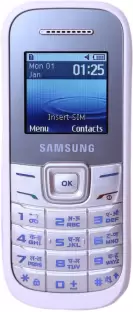
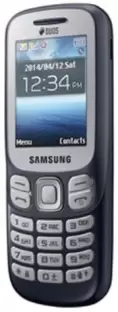
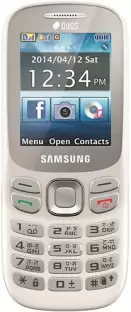
These are Keypad phones thats why ram is not mentioned.

In [ ]:
for i in df.iloc[not_match_ram]['imgURL']:
    print(i)

https://rukminim2.flixcart.com/image/312/312/kn6cxow0/mobile/q/4/z/guru-music-2-sm-b310ezkdins-samsung-original-imagfwzxgcgd3va3.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/ke7ff680pkrrdj/mobile/f/j/q/samsung-guru-music-2-sm-b310e-sm-b310e-original-imaeqzu4ycch8hhf.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/kx9as280/mobile/w/d/m/guru-1200-gt-e1215zkains-samsung-original-imag9rbacapgffzg.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/klphn680/mobile/h/b/f/guru-music-2-sm-b310ezbdins-samsung-original-imagyrzk4r4gmjvf.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/jk76j680/mobile/7/y/b/samsung-guru-music-2-sm-b310e-original-imaf7kzzzhtaahu4.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/kn6cxow0/mobile/p/p/r/guru-1200-gt-e1200zkyins-samsung-original-imagfwzx5z9ry8eh.jpeg?q=70
https://rukminim2.flixcart.com/image/312/312/jh6l2fk0/mobile/x/6/g/samsung-guru-1200-gt-e1200zdyins-original-imaf59chuhfyz7rv.jpeg?q=70
https://rukminim2.flixcart.com/im

### Just removing these mobile phones

In [ ]:
df = df.drop(index=not_match_ram)

In [ ]:
# df

In [ ]:
df['ram'] = df['ram'].astype('Int16')

ValueError: invalid literal for int() with base 10: 'MBRAM153'

In [ ]:
df[df['ram'] == 'MBRAM153']

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
41,SAMSUNG Guru 1200,4.0,"₹1,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage153 MBRAM153 MBPhone Book Memo...,Operating SystemAndroid 13Processor TypeDimens...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",800,153,MBRAM153
341,SAMSUNG GURU GT,4.3,"₹1,599",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage153 MBRAM153 MB,Operating System1Processor TypeNA 0 Single Cor...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",800,153,MBRAM153
375,SAMSUNG Guru GT,4.0,"₹1,850",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage153 MBRAM153 MBPhone Book Memo...,Operating SystemAndroid Pie 10Processor TypeQu...,"Network Type4G VOLTE, 3GSupported Networks4G V...",800,153,MBRAM153


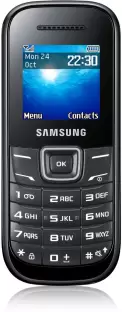

In [ ]:
df[df['ram'] == 'MBRAM153']['imgURL'][41]

'https://rukminim2.flixcart.com/image/312/312/mobile/g/t/z/samsung-guru-gt-e1200-original-imaebprntwrt6xa7.jpeg?q=70'

In [ ]:
df = df.drop(labels=df[df['ram'] == 'MBRAM153'].index)

In [ ]:
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
0,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,"₹8,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBTotal Memory64 GBE...,Operating SystemAndroid 12Processor TypeMediat...,"Network Type4G, 3G, 2GSupported NetworksGSM, C...",5000,64,4
1,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,64,4
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,64,4
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹10,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,64,4
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹11,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",6000,128,4
...,...,...,...,...,...,...,...,...,...,...
487,SAMSUNG SM-B310EZDDINS,4.3,"₹2,149",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 13Processor TypeQualco...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",5000,64,4
488,"SAMSUNG Galaxy M11 (Violet, 64 GB)",4.6,"₹12,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 10Processor TypeEx...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",4000,32,3
489,"SAMSUNG Galaxy M01 (Red, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid Nougat 7Processor Type...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",5000,128,4
490,"SAMSUNG Galaxy A12 (Blue, 128 GB)",4.2,"₹14,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeMediaT...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",4500,128,6


In [ ]:
df[df['ram'] == 'MBRAM4']

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
46,SAMSUNG GURU 1200,4.1,"₹1,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage4 MBRAM4 MB,Operating SystemAndroid 12Processor CoreOcta C...,"Network Type2G, 3GSupported NetworksGSM",800,4,MBRAM4
48,SAMSUNG GURU 1200,4.1,"₹1,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage4 MBRAM4 MB,Operating SystemAndroid 12Processor TypeMediaT...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",800,4,MBRAM4
154,SAMSUNG Metro 313,4.3,"₹2,299",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage2 MBRAM4 MBExpandable Storage1...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",1000,2,MBRAM4
246,SAMSUNG Metro 313,4.4,"₹2,099",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage2.27 MBRAM4 MBSupported Memory...,Operating SystemAndroid 12Processor TypeExynos...,"Network Type3G, 4G VOLTESupported NetworksGSM,...",1000,2.27,MBRAM4
336,SAMSUNG Guru Music 2,4.4,"₹1,990",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage4 MBRAM4 MBCall Log MemoryYesS...,Operating SystemAndroid Q 10.0VPrimary Clock S...,Network Type4G VOLTESupported Networks4G VoLTE,800,4,MBRAM4


In [ ]:
df = df.drop(labels=df[df['ram'] == 'MBRAM4'].index)

In [ ]:
df['ram'] = df['ram'].astype('Int16')

ValueError: invalid literal for int() with base 10: 'MBRAM10'

## I am removing these samsung guru also.

In [ ]:
df.reset_index(inplace=True)

## Processors


In [ ]:
def extract_processor(text):
    pattern = r'.*Processor'
    match = re.findall(pattern, text)
    if match:
        return match[0]
    else:
        return text


In [ ]:
df['processors'] = df['os_processor'].apply(func=extract_processor)

## Android Version

In [ ]:
def android_version(text_):
    pattern=r'^\d+[Processor]|\d+[GProcessor]|\d+[.Processor]'
    found = re.findall(pattern,text_)
    if found:
        return found[0]
    else:
        return np.nan

In [ ]:
df['android_version'] = df['processors'].apply(android_version)

In [ ]:
for Index,i in enumerate(df['android_version']):
    # print(i)
    i = str(i).replace('P','')
    i = str(i).replace('.','')
    df['android_version'][Index] = i

In [ ]:
# df['android_version'] = df['android_version'].astype('Int16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            498 non-null    int64  
 1   model_names      498 non-null    object 
 2   ratings          498 non-null    float64
 3   price            498 non-null    object 
 4   imgURL           498 non-null    object 
 5   storage_ram      498 non-null    object 
 6   os_processor     498 non-null    object 
 7   network          498 non-null    object 
 8   battery          498 non-null    Int16  
 9   storage          498 non-null    Int16  
 10  ram              498 non-null    Int16  
 11  processors       498 non-null    object 
 12  android_version  498 non-null    object 
dtypes: Int16(3), float64(1), int64(1), object(8)
memory usage: 43.4+ KB


In [ ]:
# df

## Processors

In [ ]:
def processor(text):
    pattern=r'(?<=Type).*'
    search = re.search(pattern,text)
    if search != None:
        return ' '.join(re.findall(pattern,text))
    else:
        return 'not montioned'

In [ ]:
df['processors'] = df['processors'].apply(processor)

In [ ]:
df

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram,processors,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,6000,128,8,not montioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,6000,128,8,not montioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",5000,32,2,not montioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",4050,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,4000,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",4520,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",4000,64,4,Qualcomm Snapdragon 636Processor,7


## Remove columns
1) storage_ram
2) os_processor


In [ ]:
df = df.drop(columns=['os_processor','storage_ram'])

In [ ]:
df.rename({'processors':'processor'},axis=1,inplace=True)

In [ ]:
# df.tail()

## Price

In [ ]:
for Index,i in enumerate(df['price']):
    i = str(i).replace('₹','')
    i = str(i).replace(',','')
    df['price'][Index] = i

In [ ]:
df['price'] = df['price'].astype('Int16')

In [ ]:
df

,index,model_names,ratings,price,imgURL,network,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,https://rukminim2.flixcart.com/image/312/312/x...,Network Type4G VOLTESupported Networks4G LTE,6000,128,8,not montioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,https://rukminim2.flixcart.com/image/312/312/x...,Network Type4G VOLTESupported Networks4G VoLTE,6000,128,8,not montioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",5000,32,2,not montioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type4G VOLTE, 4GSupported Networks4G V...",5000,32,3,not montioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type5G, 4G VOLTESupported Networks5G, ...",4250,128,6,Qualcomm Snapdragon 778GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",4050,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/m...,Network Type4G VOLTESupported Networks4G LTEBl...,4000,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type4G VOLTE, 5GSupported Networks4G V...",4520,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",4000,64,4,Qualcomm Snapdragon 636Processor,7


## Processor

In [ ]:
df['processor']

0                                         not montioned
1                                         not montioned
2                                         not montioned
3                                         not montioned
4                     Qualcomm Snapdragon 778GProcessor
                             ...                       
493    Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor
494                                       not montioned
495                                       not montioned
496                    Qualcomm Snapdragon 636Processor
497                    Qualcomm Snapdragon 435Processor
Name: processor, Length: 498, dtype: object

In [ ]:
@ensure_annotations
def random_values(feature_name:str,total=6):
    for i in range(0,total):
        index = np.random.randint(df.shape[0])
        print(index,':',df[feature_name].iloc[index])
            

In [ ]:
random_values('processor',10)

92 : Mediatek Dimensity 920Processor
15 : 2.0 GHz Mediatek P22 OctacoreProcessor
489 : Qualcomm Snapdragon 410 MSM8916Processor
116 : Qualcomm Snapdragon 730Processor
229 : not montioned
382 : Qualcomm® Snapdragon™ 720GProcessor
22 : Qualcomm Snapdragon 636Processor
77 : Qualcomm Snapdragon 636Processor
340 : not montioned
289 : not montioned


In [ ]:
def processor_extract(text):
    splitted_sentence = text.split()
    if 'Mediatek' and 'Helio' in splitted_sentence:
        pattern = r'\d+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Heilo'+''.join(match)

    elif 'Mediatek' and 'Dimensity' in splitted_sentence:
        pattern = r'\d+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Dimensity'+ ''.join(match)

    elif 'Snapdragon' and 'Gen' and '4' in splitted_sentence:
        return 'Gen4'   

    elif 'Snapdragon' and 'Gen' and '8' in splitted_sentence:         
        return 'Gen8'
    
    elif 'Snapdragon' in splitted_sentence:
        pattern = r'\d+[Processor]|\d+[GProcessor]'
        if 'Gen' and '4' and '8' not in splitted_sentence:
            string = ' '.join(splitted_sentence)
            match = re.findall(pattern,string)
            return 'Snapdragon'+''.join(match)

    else:
        return 'not mentioned'      

In [ ]:
df['processor']=df['processor'].apply(processor_extract)

In [ ]:
random_values('processor')

26 : not mentioned
193 : Dimensity1080P
355 : not mentioned
462 : Snapdragon
251 : Heilo35P
472 : Snapdragon855P


## Network
I don't need in my project I will just drop.

In [ ]:
df = df.drop(labels=['network'],axis=1)

In [ ]:
df

,index,model_names,ratings,price,imgURL,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,https://rukminim2.flixcart.com/image/312/312/x...,6000,128,8,not mentioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,https://rukminim2.flixcart.com/image/312/312/x...,6000,128,8,not mentioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,https://rukminim2.flixcart.com/image/312/312/x...,5000,32,2,not mentioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,https://rukminim2.flixcart.com/image/312/312/x...,5000,32,3,not mentioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,https://rukminim2.flixcart.com/image/312/312/x...,4250,128,6,Snapdragon778G,11
...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,https://rukminim2.flixcart.com/image/312/312/k...,4050,32,3,Snapdragon8G,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/m...,4000,32,3,not mentioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,https://rukminim2.flixcart.com/image/312/312/k...,4520,128,6,not mentioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,https://rukminim2.flixcart.com/image/312/312/k...,4000,64,4,Snapdragon636P,7


In [ ]:
df.to_csv(path_or_buf='data\cleaned_dataset/mi_cleaned_data.csv')